In [1]:
import sys
sys.path.insert(0, "../scripts")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from decsma import DecSMA

In [3]:
pd.plotting.register_matplotlib_converters() # Volvemos a registrar los convertores.
plt.rcParams['figure.figsize'] = [16, 4]

In [4]:
data = pd.read_csv("../data/tabla_generacion_energia.csv", parse_dates=["fecha"])

data = data.rename(columns={"fecha":"ds", "potencia":"y"})
data = data[["ds", "y", "nub"]]
data = data.set_index("ds")

train = data.loc["2019-06":"2019-07-25"].reset_index()
test = data.loc["2019-07-26":"2019-08-07"].reset_index()

In [5]:
train_data = train.copy()
new_data = test.copy()
future = test[["ds", "nub"]].copy()
model = DecSMA(exog="nub", window=4)
forecast = []
for k in future.index:
    model.fit(train_data)
    obs = future.loc[[k]]
    fcst = model.predict(obs)
    forecast.append(fcst)
    train_data = train_data.append(new_data.loc[[k]], ignore_index=True)

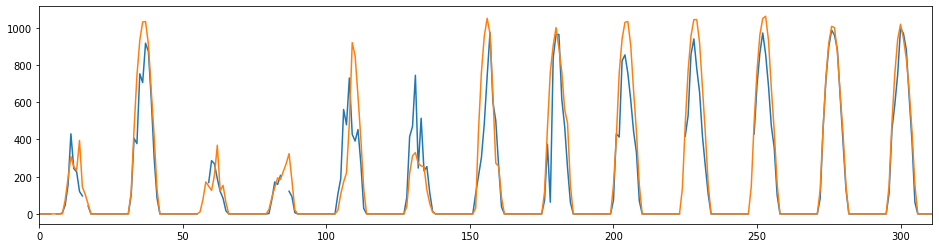

In [6]:
forecast = pd.concat(forecast, ignore_index=True).sort_values(by="ds")
forecast.yhat.plot()
test.y.plot()